In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import pickle
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Loading Data
dataset = pd.read_csv("/content/drive/MyDrive/PROJECT/Data.csv")
dataset.head()

,OBJECTID,TOID,ROADLABEL,DESCTERM,NATURE,TLRN_DATE,LAST_EDIT_DATE,Shape__Length
0,774481,4000000030318905,Bilton Way,Unclassified,Slip Road,19/04/2017,2022/01/21 15:31:46+00,50.268895
1,774482,4000000030458584,Lewisham High Street,A Road,Dual Carriageway,19/04/2017,2022/01/21 15:31:45+00,10.621233
2,774483,4000000030326363,Western Avenue,A Road,Roundabout,19/04/2017,2022/01/21 15:31:45+00,53.439662
3,774484,4000000031142155,High Street Collier's Wood,A Road,Single Carriageway,19/04/2017,2022/01/21 15:31:44+00,8.656262
4,774485,4000000030398682,Colnbrook By- Pass,A Road,Single Carriageway,19/04/2017,2022/01/21 15:31:46+00,34.111032


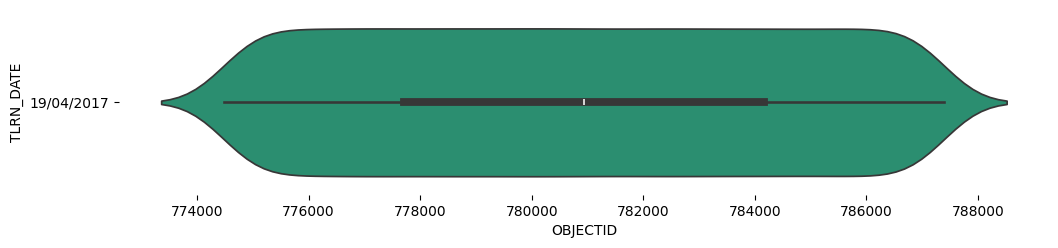

In [37]:
# @title TLRN_DATE vs OBJECTID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['TLRN_DATE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='OBJECTID', y='TLRN_DATE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

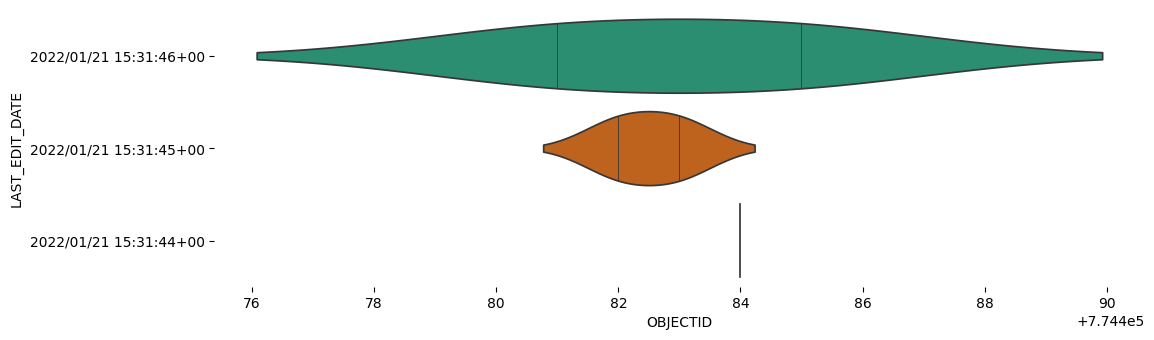

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['LAST_EDIT_DATE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='OBJECTID', y='LAST_EDIT_DATE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

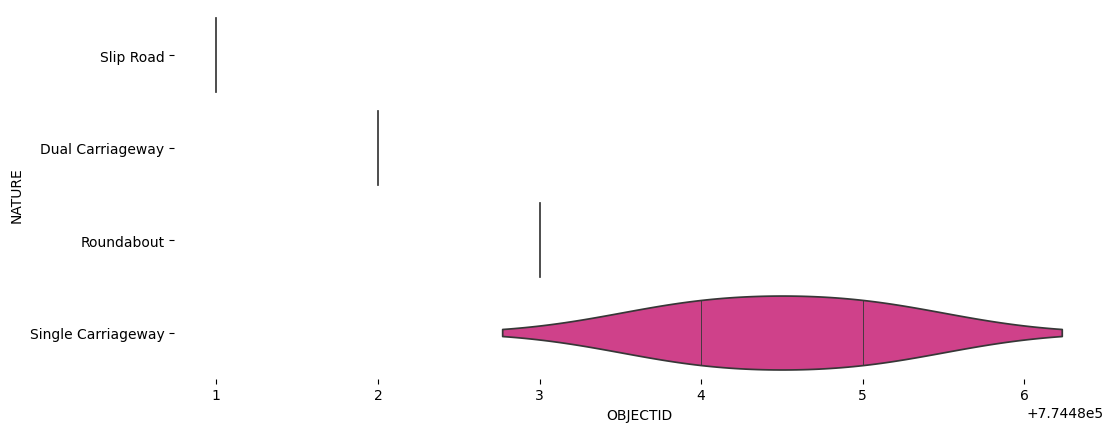

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['NATURE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='OBJECTID', y='NATURE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

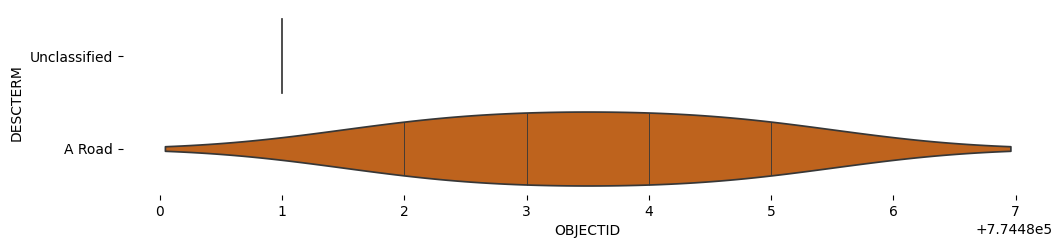

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['DESCTERM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='OBJECTID', y='DESCTERM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

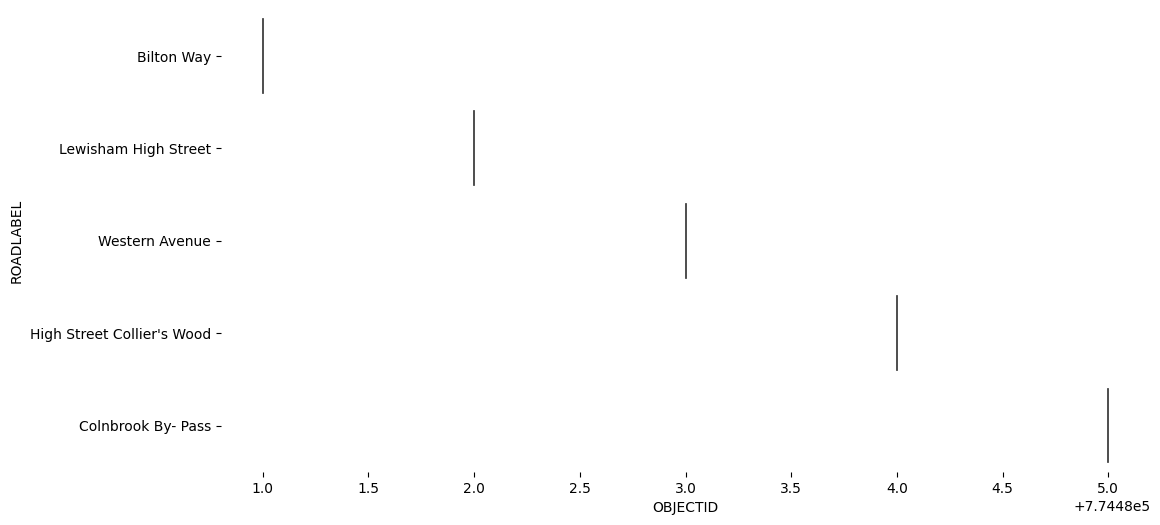

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['ROADLABEL'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='OBJECTID', y='ROADLABEL', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

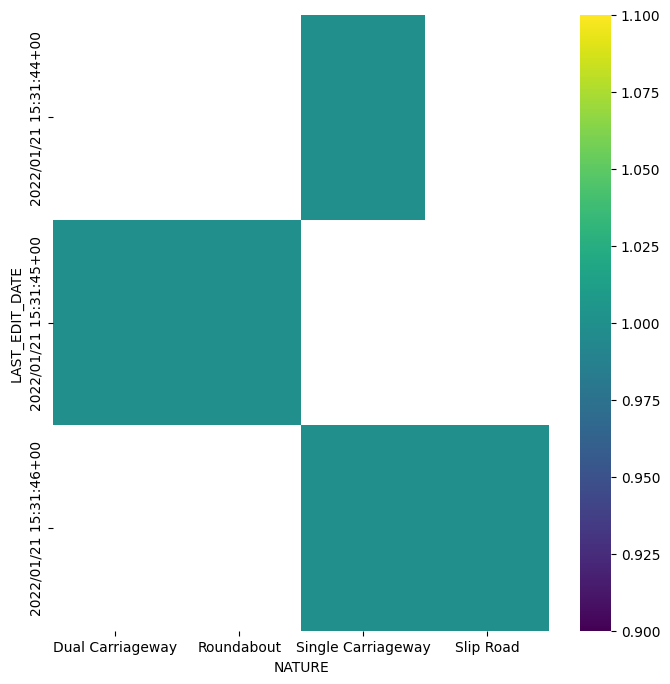

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LAST_EDIT_DATE'].value_counts()
    for x_label, grp in _df_18.groupby('NATURE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NATURE')
_ = plt.ylabel('LAST_EDIT_DATE')

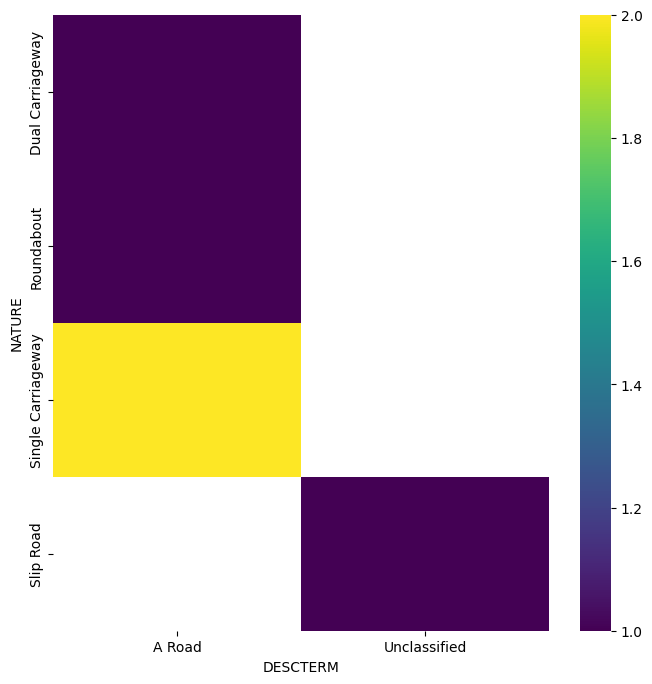

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NATURE'].value_counts()
    for x_label, grp in _df_17.groupby('DESCTERM')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DESCTERM')
_ = plt.ylabel('NATURE')

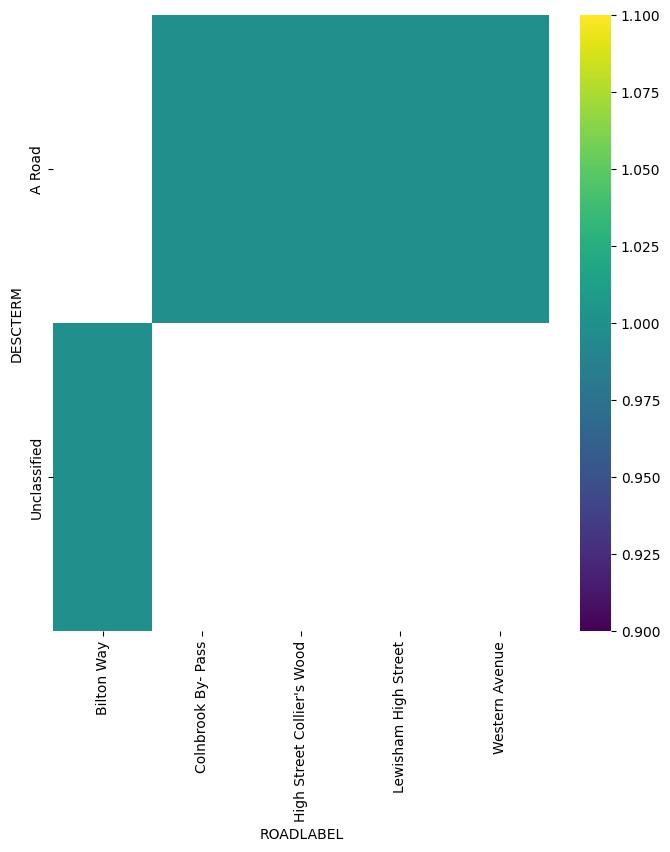

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DESCTERM'].value_counts()
    for x_label, grp in _df_16.groupby('ROADLABEL')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ROADLABEL')
_ = plt.ylabel('DESCTERM')

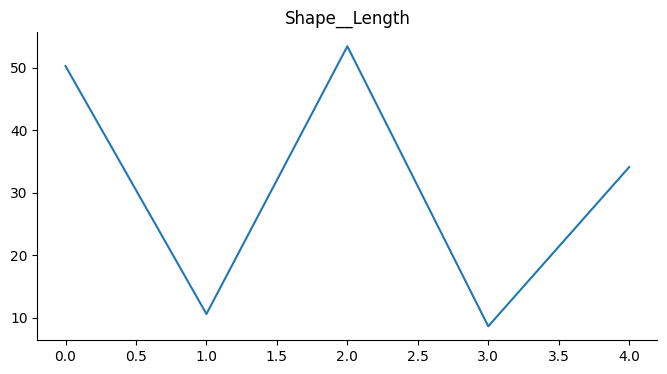

In [29]:
from matplotlib import pyplot as plt
_df_15['Shape__Length'].plot(kind='line', figsize=(8, 4), title='Shape__Length')
plt.gca().spines[['top', 'right']].set_visible(False)

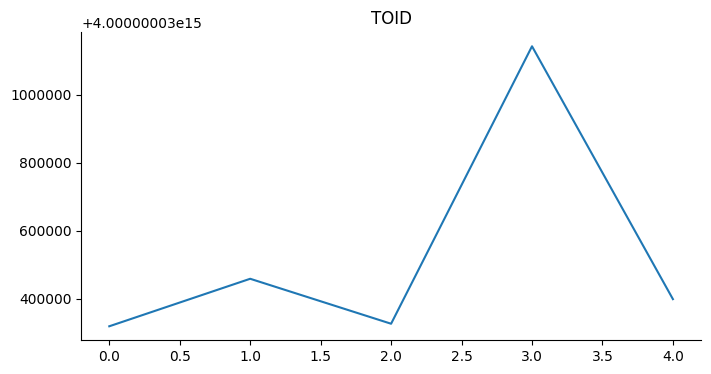

In [28]:
from matplotlib import pyplot as plt
_df_14['TOID'].plot(kind='line', figsize=(8, 4), title='TOID')
plt.gca().spines[['top', 'right']].set_visible(False)

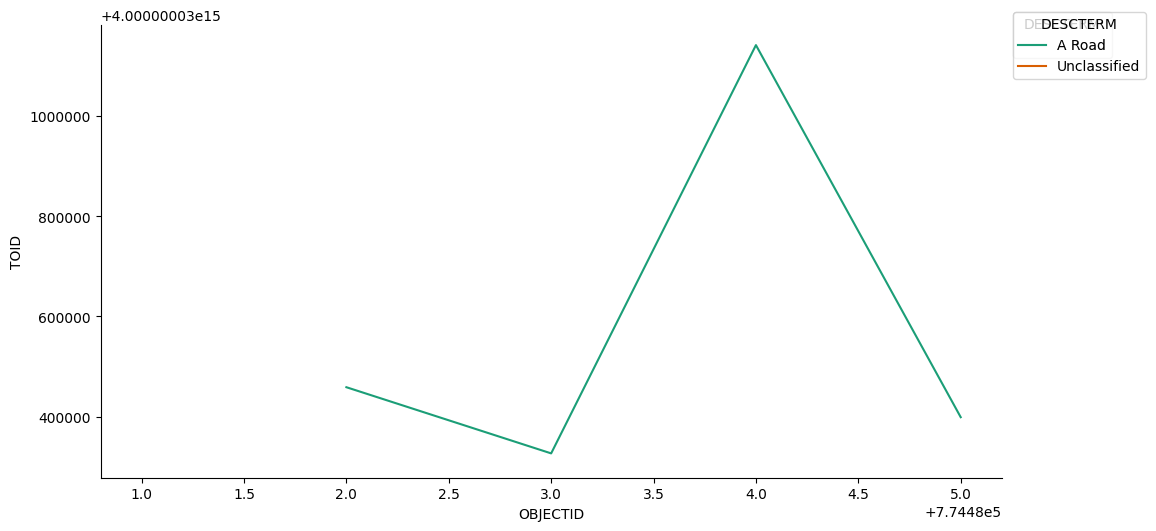

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['TOID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('OBJECTID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DESCTERM')):
  _plot_series(series, series_name, i)
  fig.legend(title='DESCTERM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('TOID')

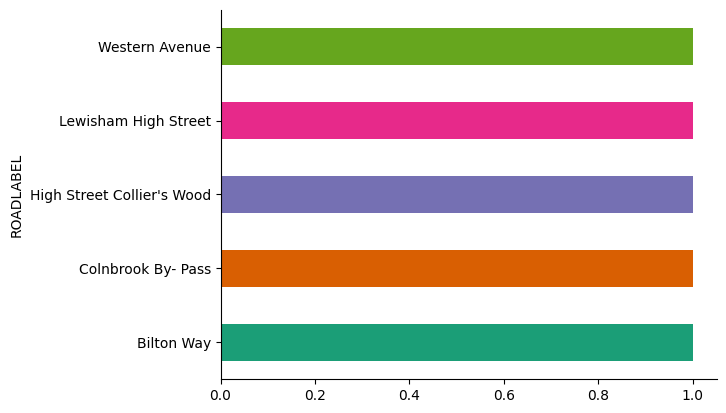

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('ROADLABEL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

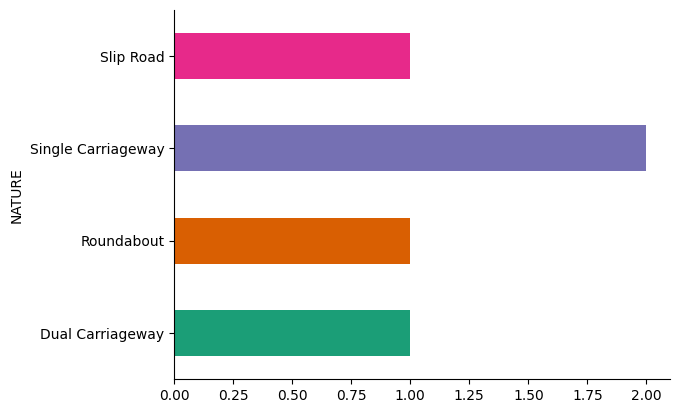

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('NATURE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

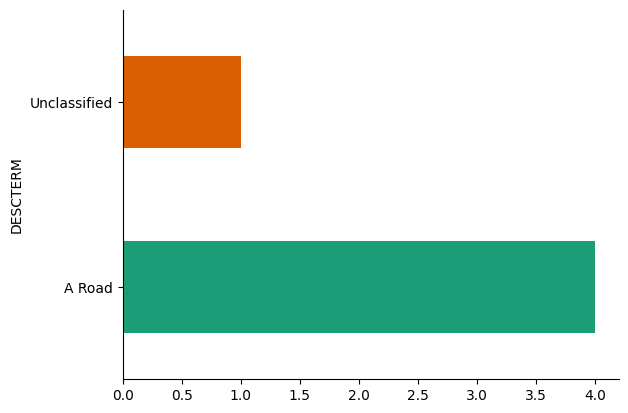

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('DESCTERM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

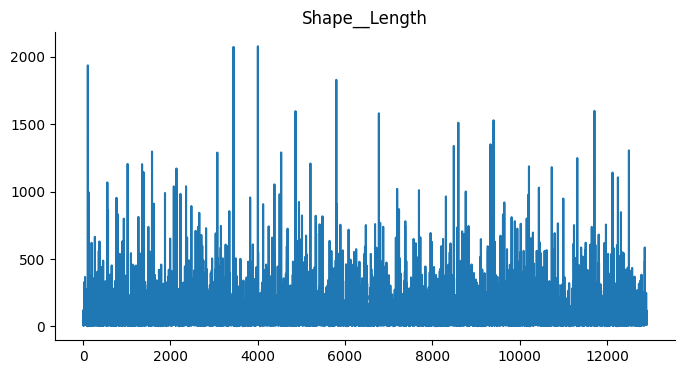

In [14]:
# @title Shape__Length

from matplotlib import pyplot as plt
dataset['Shape__Length'].plot(kind='line', figsize=(8, 4), title='Shape__Length')
plt.gca().spines[['top', 'right']].set_visible(False)

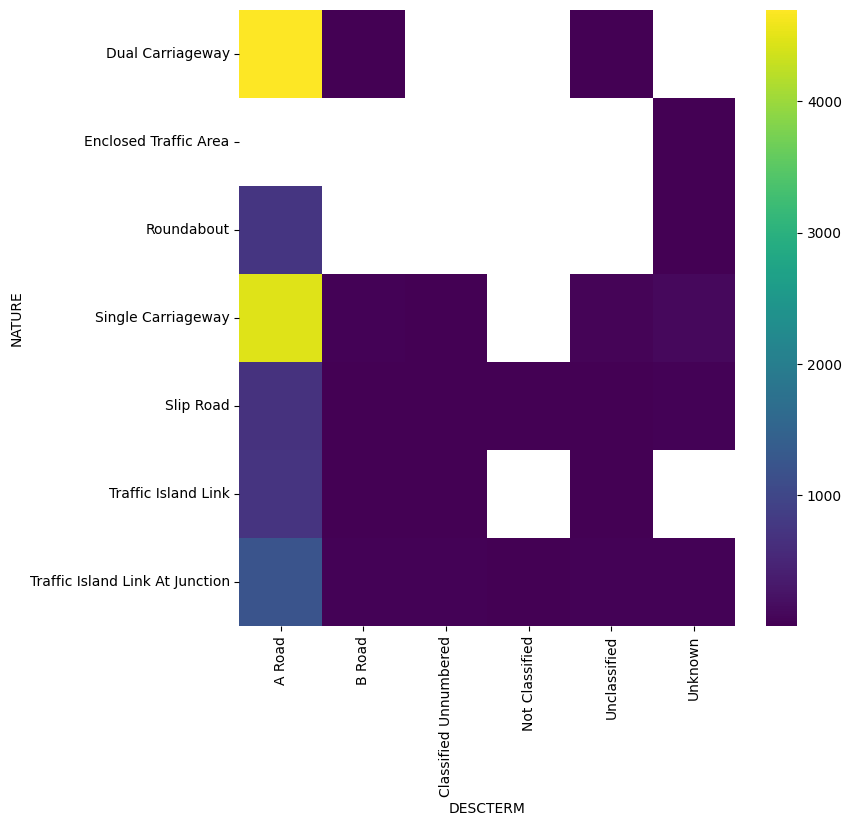

In [16]:
# @title DESCTERM vs NATURE

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NATURE'].value_counts()
    for x_label, grp in dataset.groupby('DESCTERM')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DESCTERM')
_ = plt.ylabel('NATURE')

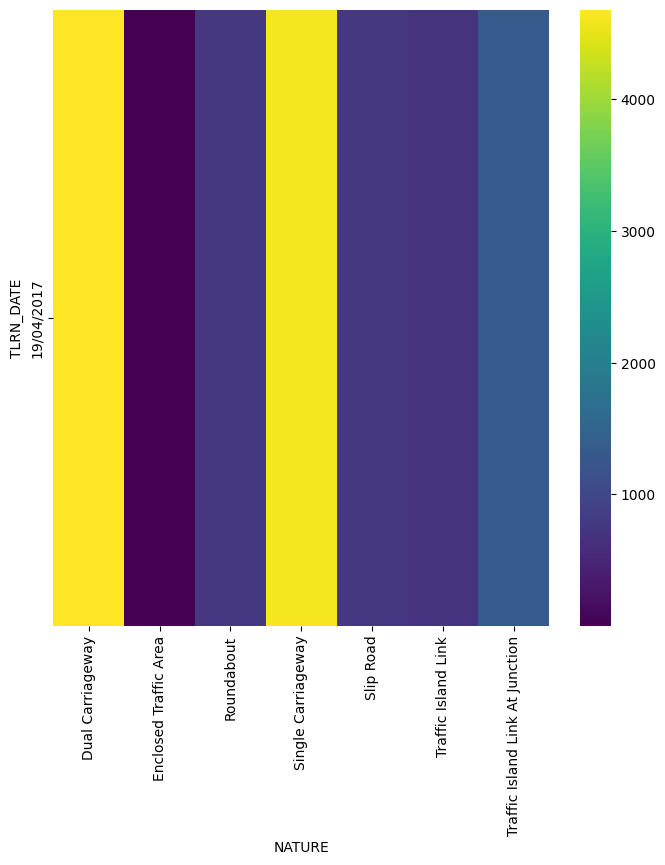

In [18]:
# @title NATURE vs TLRN_DATE

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLRN_DATE'].value_counts()
    for x_label, grp in dataset.groupby('NATURE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NATURE')
_ = plt.ylabel('TLRN_DATE')

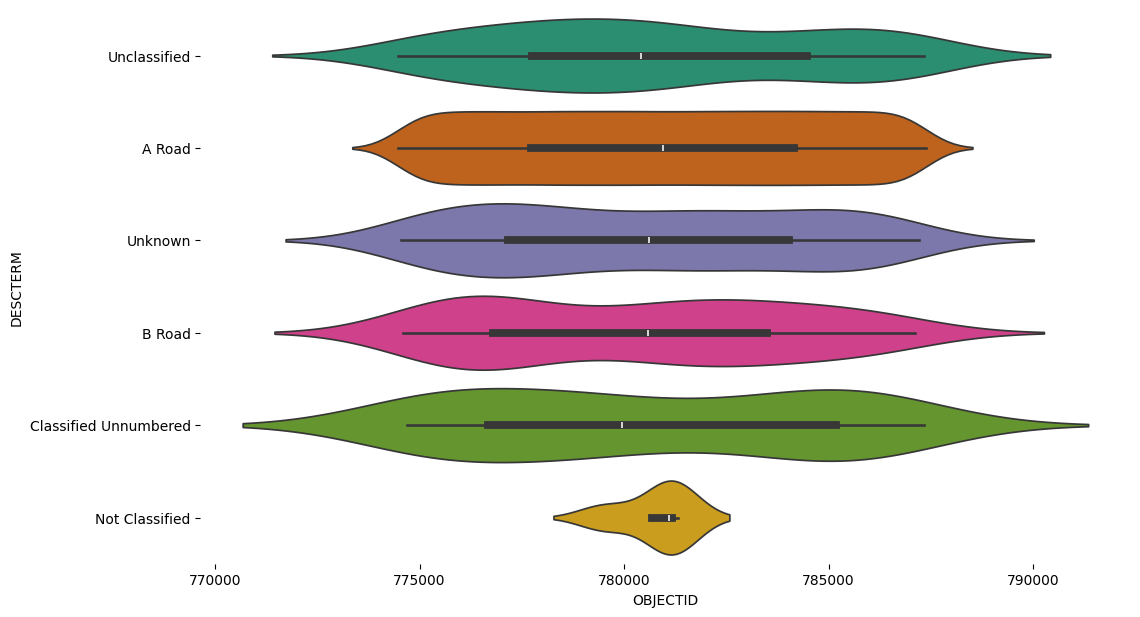

In [20]:
# @title DESCTERM vs OBJECTID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['DESCTERM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='OBJECTID', y='DESCTERM', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

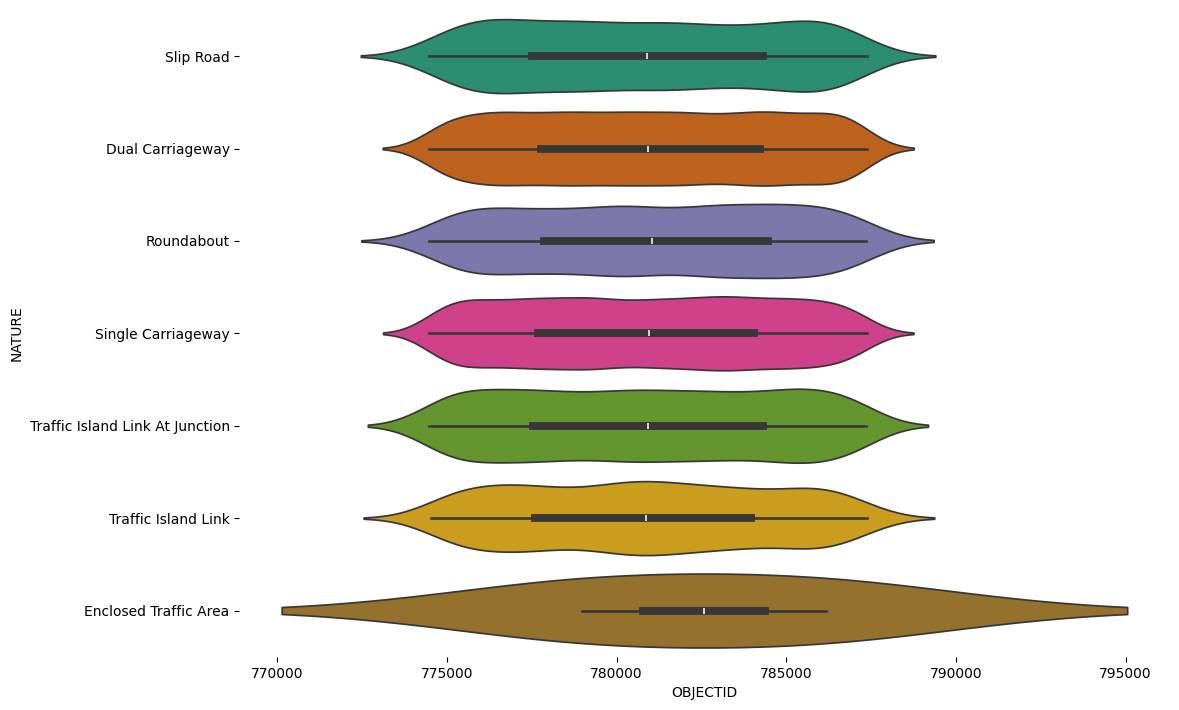

In [22]:
# @title NATURE vs OBJECTID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['NATURE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='OBJECTID', y='NATURE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)